In [1]:
#cell 1
    
%run "00_predef.ipynb"

In [2]:
#cell 2
import os
import uproot
import awkward as ak
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
data_dir = '/home/fdolek/work/data/baseline/'
single_file_name = 'baseline_35.root'
root_file = os.path.join(data_dir, single_file_name)

# Read and process the single file
print(root_file)
file = uproot.open(root_file)
tree = file["ntuple_sig"]
all_data = tree.arrays()
all_arrays = [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

# Stack arrays horizontally
all_arrays_stacked = np.vstack(all_arrays)

smodule = all_arrays_stacked[64]
channels = all_arrays_stacked[:64]

# Separate data by module
mod1 = smodule == 1
mod2 = smodule == 2
mod3 = smodule == 3
mod7 = smodule == 7

# Calculate baselines for each module
base1 = np.mean(channels[:, mod1], axis=1)
base2 = np.mean(channels[:, mod2], axis=1)
base3 = np.mean(channels[:, mod3], axis=1)
base7 = np.mean(channels[:, mod7], axis=1)


/home/fdolek/work/data/baseline/baseline_35.root


In [4]:
# Define the path to the directory containing the ROOT files
data_dir = '/home/fdolek/work/data/signal/'

# Get a list of all ROOT files in the directory
root_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.root')]

# Process all files or just a single file
process_all_files = True
single_file_name = '1681237974_35.root'


In [5]:
%matplotlib widget
allArrays = np.empty((71, 0)) #np.array([])

for root_file in root_files:
    if not process_all_files and os.path.basename(root_file) != single_file_name:
        continue
    print(root_file)    
    ###################### Your code here##################################
    
    all_arrays = []
    file = uproot.open(root_file)
    tree = file["ntuple_sig"]
    all_data = tree.arrays()
    all_arrays += [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

    # Stack arrays horizontally
    all_arrays_stacked = np.vstack(all_arrays)
    print(allArrays.shape,all_arrays_stacked.shape)

    allArrays = np.concatenate([allArrays, all_arrays_stacked],axis=1)
    


/home/fdolek/work/data/signal/1681238034_35.root
(71, 0) (71, 121823)
/home/fdolek/work/data/signal/1681238434_35.root
(71, 121823) (71, 232595)
/home/fdolek/work/data/signal/1681238314_35.root
(71, 354418) (71, 232417)
/home/fdolek/work/data/signal/1681238554_35.root
(71, 586835) (71, 233417)
/home/fdolek/work/data/signal/1681238674_35.root
(71, 820252) (71, 220011)
/home/fdolek/work/data/signal/1681238654_35.root
(71, 1040263) (71, 232213)
/home/fdolek/work/data/signal/1681238294_35.root
(71, 1272476) (71, 129257)
/home/fdolek/work/data/signal/1681238254_35.root
(71, 1401733) (71, 122288)
/home/fdolek/work/data/signal/1681238014_35.root
(71, 1524021) (71, 122691)
/home/fdolek/work/data/signal/1681238474_35.root
(71, 1646712) (71, 233503)
/home/fdolek/work/data/signal/1681238274_35.root
(71, 1880215) (71, 122658)
/home/fdolek/work/data/signal/1681238194_35.root
(71, 2002873) (71, 123027)
/home/fdolek/work/data/signal/1681238634_35.root
(71, 2125900) (71, 232450)
/home/fdolek/work/data

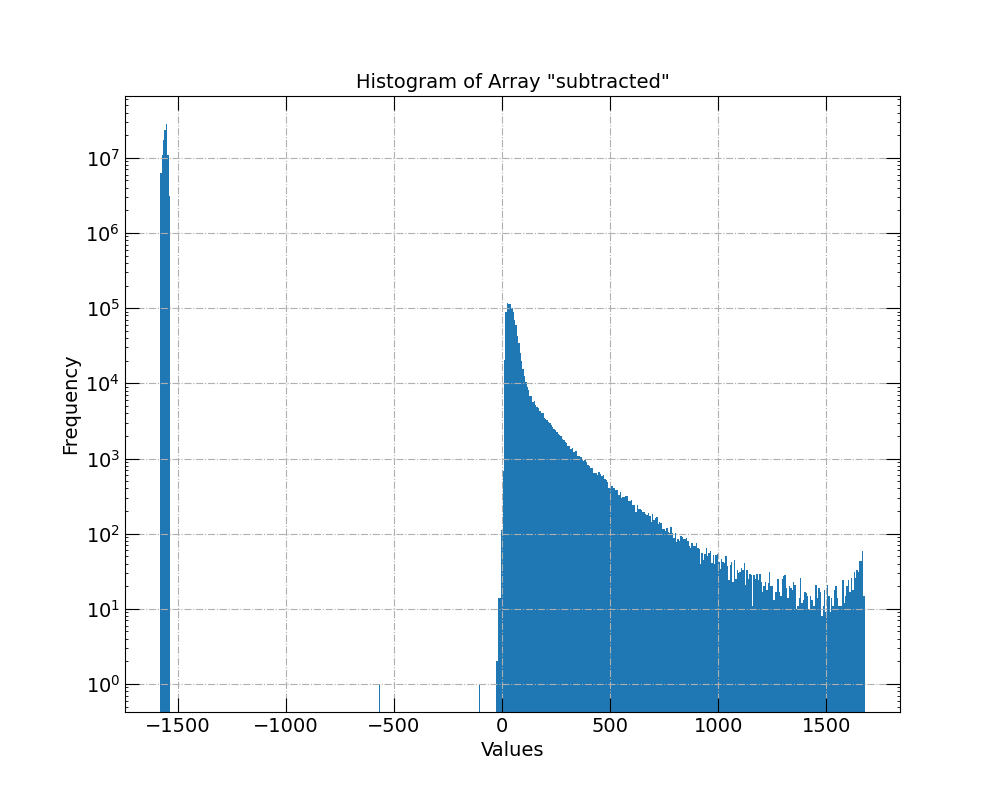

In [49]:
smodule= allArrays[64]
stype= allArrays[65]
slen= allArrays[66]
stime_sec_high= allArrays[67]
stime_sec_low= allArrays[68]
stime_16ns_high= allArrays[69]
stime_16ns_low= allArrays[70]
channels=allArrays[:64]

mod1 = smodule == 1
mod2 = smodule == 2
mod3 = smodule == 3
mod7 = smodule == 7

# Define the modulation masks and labels
mod_masks = [mod1, mod2, mod3, mod7]
mod_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']

channels_mod1 = channels[:, mod1]
#channels_mod1[channels_mod1<0] = 0
subtracted = channels_mod1 - base1.reshape(-1, 1)


# Creating the histogram using matplotlib
fig, ax = plt.subplots()



plt.hist(subtracted.flatten(), bins=500)

# Adding title and labels
plt.title('Histogram of Array "subtracted"')
plt.xlabel('Values')
plt.ylabel('Frequency')
ax.set_yscale('log')
# Displaying the histogram
plt.show()

In [7]:
subtracted[0][subtracted[0]>-50]

array([ 79.35205078, 151.35205078,  44.35205078, ..., 449.35205078,
       246.35205078, 262.35205078])

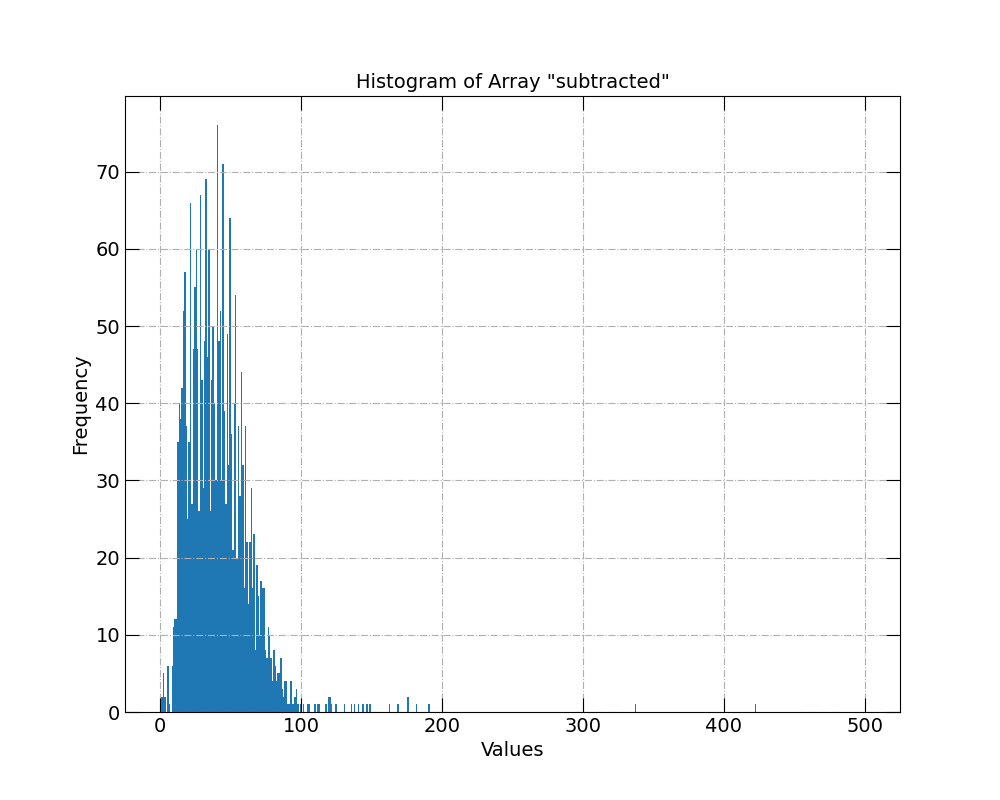

In [53]:
# Creating the histogram using matplotlib
import pylandau
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
#data =subtracted[63][subtracted[63]>-100]
data =subtracted[11]

# Define the bin edges
bin_edges = np.linspace(0, 500, num=500)

# Plot the histogram with fixed bins
plt.hist(data, bins=bin_edges)

# Adding title and labels
plt.title('Histogram of Array "subtracted"')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Displaying the histogram
plt.show()

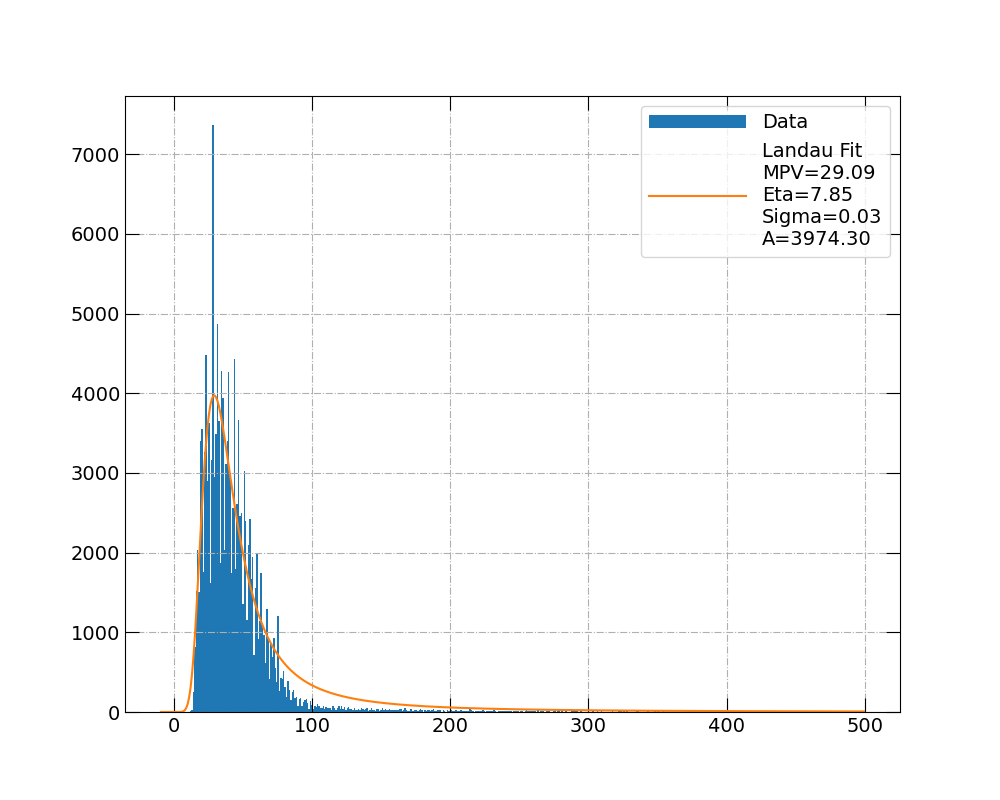

In [70]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pylandau

fig, ax = plt.subplots()
#data =subtracted[63][subtracted[63]>-100]
data =subtracted[63]
# Create fake data with possion error
mpv, eta, sigma, A = 30, 6, 4, 18000
bin_edges = np.linspace(-10, 500, num=500)

# Calculate the histogram and the midpoints of the bins
y, bin_edges = np.histogram(data, bins=bin_edges)
x = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.hist(data, bins=bin_edges, label="Data")

# Fit with constrains
coeff, pcov = curve_fit(pylandau.langau, x, y,
                        absolute_sigma=True,
                        p0=(mpv, eta, sigma, A),
                        )

# Plot
fit_label = f"Landau Fit\nMPV={coeff[0]:.2f}\nEta={coeff[1]:.2f}\nSigma={coeff[2]:.2f}\nA={coeff[3]:.2f}"
plt.plot(x, pylandau.langau(x, *coeff), "-", label=fit_label)
#plt.plot(x, pylandau.langau(x, *coeff), ".", label=fit_label)

# Add legend
plt.legend()
#ax.set_yscale('log')

plt.show()


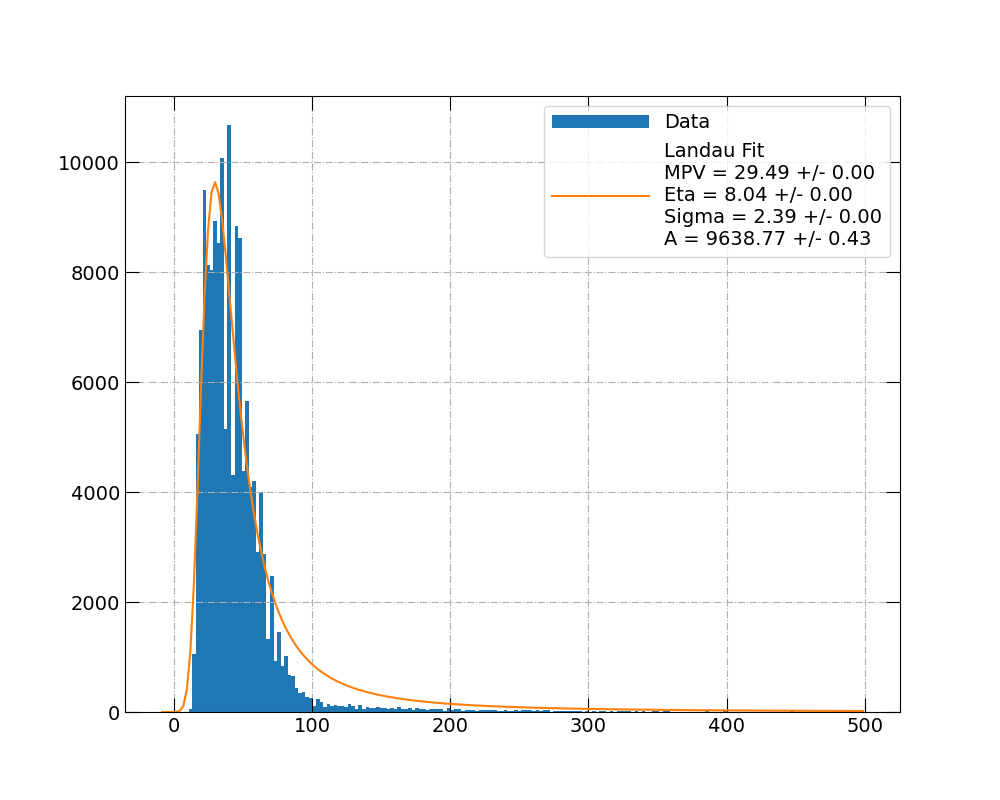

In [72]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pylandau

fig, ax = plt.subplots()
data = subtracted[63]
mpv, eta, sigma, A = 30, 6, 4, 18000
bin_edges = np.linspace(-10, 500, num=200)

y, bin_edges = np.histogram(data, bins=bin_edges)
x = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.hist(data, bins=bin_edges, label="Data")

coeff, pcov = curve_fit(pylandau.langau, x, y,
                        absolute_sigma=True,
                        p0=[mpv, eta, sigma, A],
                        )

fit_label = (f"Landau Fit\n"
             f"MPV = {coeff[0]:.2f} +/- {np.sqrt(pcov[0, 0]):.2f}\n"
             f"Eta = {coeff[1]:.2f} +/- {np.sqrt(pcov[1, 1]):.2f}\n"
             f"Sigma = {coeff[2]:.2f} +/- {np.sqrt(pcov[2, 2]):.2f}\n"
             f"A = {coeff[3]:.2f} +/- {np.sqrt(pcov[3, 3]):.2f}")
plt.plot(x, pylandau.langau(x, *coeff), "-", label=fit_label)

plt.legend()
plt.show()


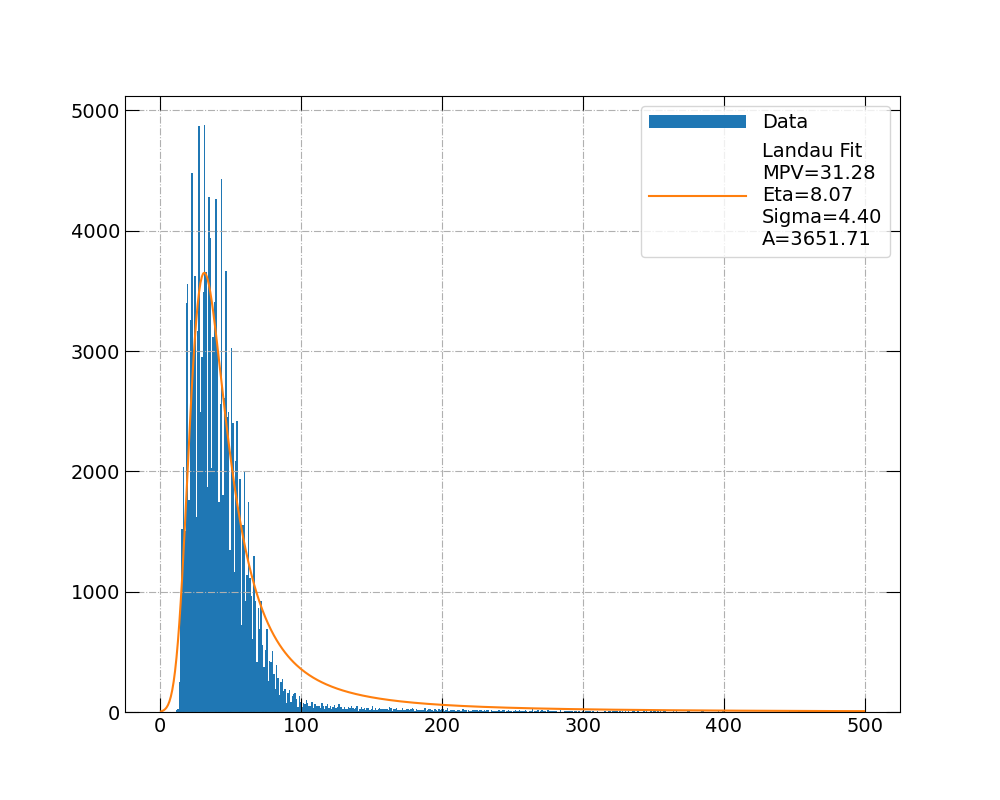

In [45]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pylandau

fig, ax = plt.subplots()
#data =subtracted[63][subtracted[63]>-100]
data =subtracted[63]
# Create fake data with possion error
mpv, eta, sigma, A = 30, 6, 4, 18000
bin_edges = np.linspace(0, 500, num=500)

# Calculate the histogram and the midpoints of the bins
y, bin_edges = np.histogram(data, bins=bin_edges)
x = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.hist(data, bins=bin_edges, label="Data")

# Fit with constrains
coeff, pcov = curve_fit(pylandau.langau, x, y,
                        absolute_sigma=True,
                        p0=(mpv, eta, sigma, A),
                        )

# Plot
fit_label = f"Landau Fit\nMPV={coeff[0]:.2f}\nEta={coeff[1]:.2f}\nSigma={coeff[2]:.2f}\nA={coeff[3]:.2f}"
plt.plot(x, pylandau.langau(x, *coeff), "-", label=fit_label)
#plt.plot(x, pylandau.langau(x, *coeff), ".", label=fit_label)

# Add legend
plt.legend()
#ax.set_yscale('log')

plt.show()


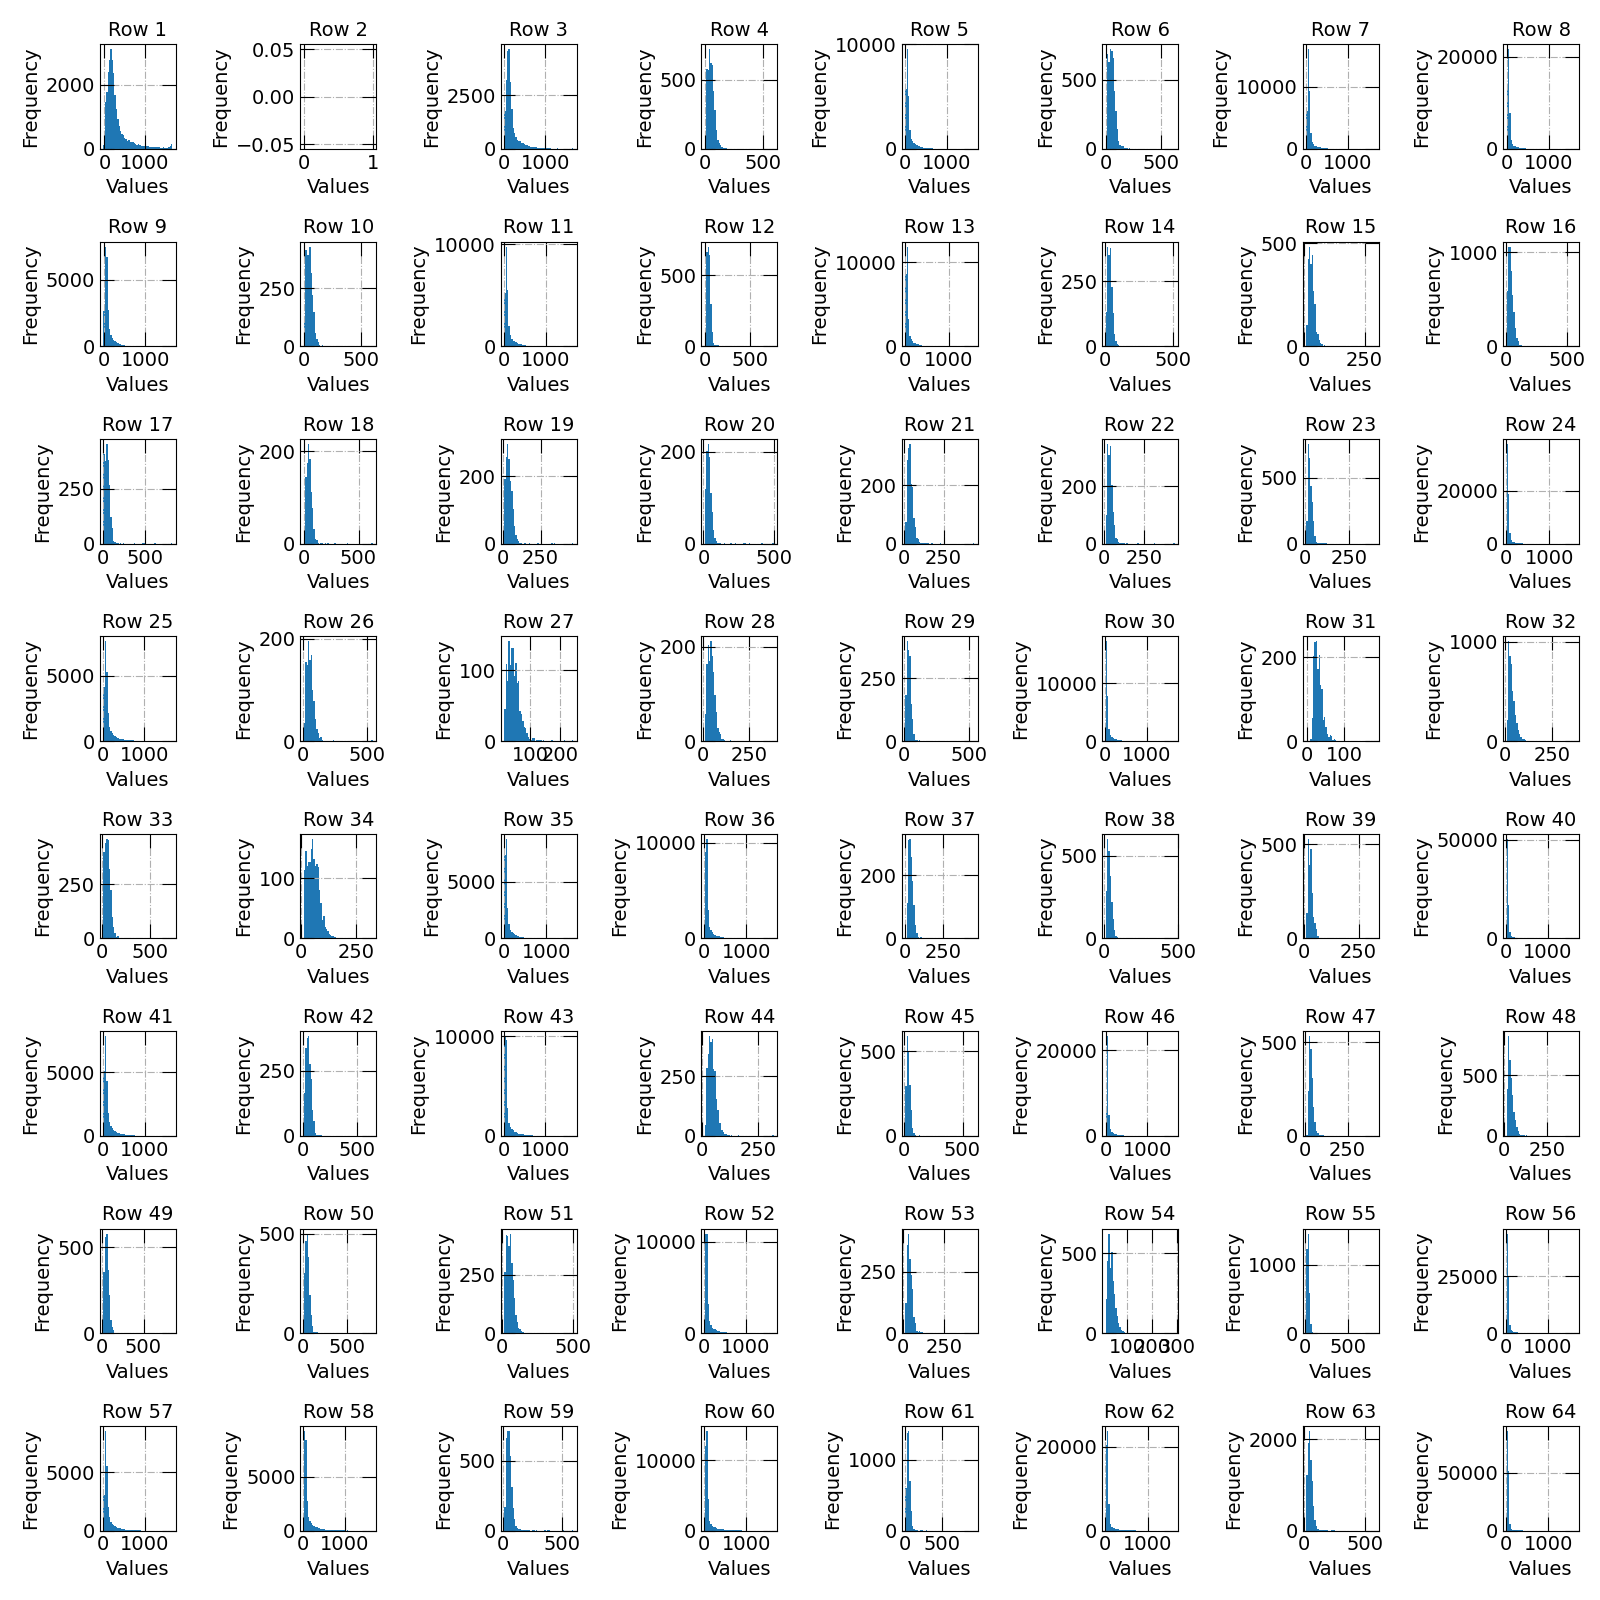

In [10]:
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(16, 16))

for i in range(64):
    ax = axs[i//8, i%8]  # indexing the subplots
    values = subtracted[i][subtracted[i] > -100]
    ax.hist(values, bins=50)
    ax.set_title(f'Row {i+1}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    #ax.set_yscale('log')

# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_48056/2164963937.py:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


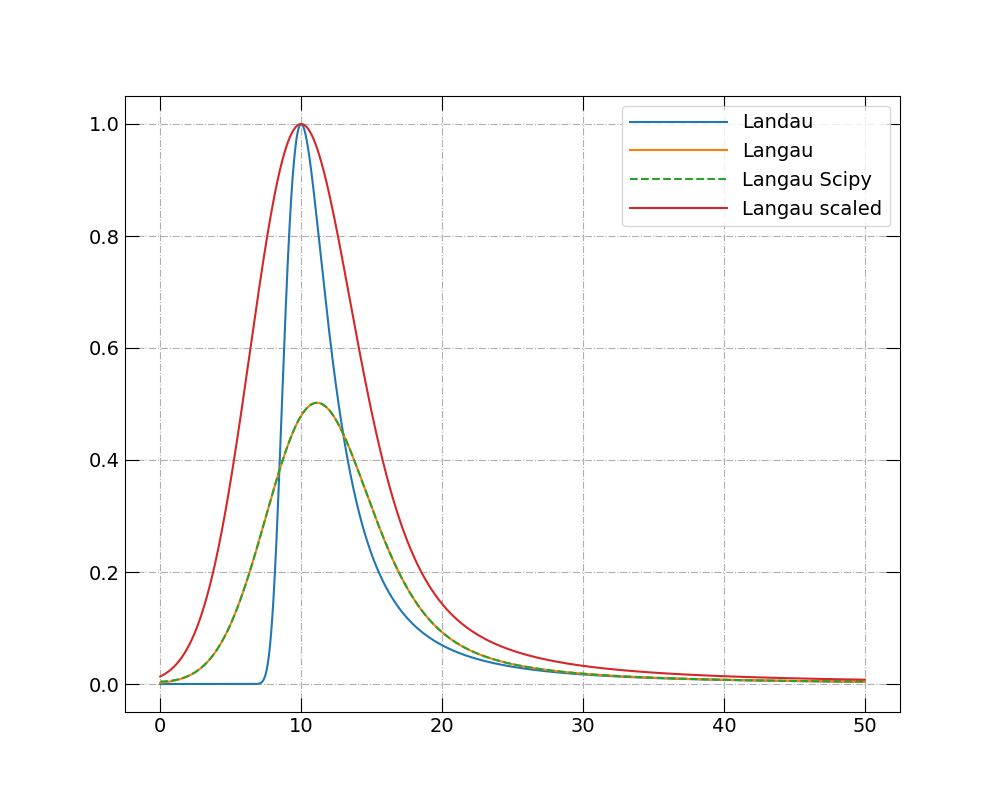

In [42]:

import numpy as np
import pylandau
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
fig, ax = plt.subplots()

mpv, eta, sigma, A = 10, 1, 3, 1
x = np.arange(0, 50, 0.01)
y = pylandau.landau(x, mpv=mpv, eta=eta, A=A)
y_gconv = gaussian_filter1d(y, sigma=sigma / 0.01)
# Scaled means that the resulting Landau*Gauss function maximum is A at mpv
# Otherwise the underlying Landau function before convolution has the 
# function maximum A at mpv
y_gconv_2 = pylandau.langau(x, mpv, eta, sigma, A, scale_langau=False)
y_gconv_3 = pylandau.langau(x, mpv, eta, sigma, A, scale_langau=True)
plt.plot(x, y, label='Landau')
plt.plot(x, y_gconv_2, label='Langau')
plt.plot(x, y_gconv, '--', label='Langau Scipy')
plt.plot(x, y_gconv_3, label='Langau scaled')
plt.legend(loc=0)
plt.show()

In [11]:
test[64]

NameError: name 'test' is not defined

In [ ]:
smodule= test[64]
stype= test[65]
slen= test[66]
stime_sec_high= test[67]
stime_sec_low= test[68]
stime_16ns_high= test[69]
stime_16ns_low= test[70]
channels=test[:64]

mod1 = smodule == 1
mod2 = smodule == 2
mod3 = smodule == 3
mod7 = smodule == 7

# Define the modulation masks and labels
mod_masks = [mod1, mod2, mod3, mod7]
mod_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']


channels_mod1 = channels[:, mod1]
subtracted = channels_mod1 - base1.reshape(-1, 1)
subtracted[subtracted<0] = 0

# Creating the histogram using matplotlib
fig, ax = plt.subplots()



plt.hist(subtracted.flatten(), bins=500)

# Adding title and labels
plt.title('Histogram of Array "subtracted"')
plt.xlabel('Values')
plt.ylabel('Frequency')
ax.set_yscale('log')
# Displaying the histogram
plt.show()

In [ ]:
channels_mod1 = channels[:, mod1]
subtracted = channels_mod1 - base1.reshape(-1, 1)
subtracted[subtracted<0] = 0
# Creating the histogram using matplotlib
fig, ax = plt.subplots()



plt.hist(subtracted.flatten(), bins=500)

# Adding title and labels
plt.title('Histogram of Array "subtracted"')
plt.xlabel('Values')
plt.ylabel('Frequency')
ax.set_yscale('log')
# Displaying the histogram
plt.show()

In [ ]:
channels_mod1.shape

In [ ]:
base1.shape

In [ ]:
subtracted = channels_mod1 - base1.reshape(-1, 1)
subtracted[subtracted<0] = 0


In [ ]:
subtracted[0]

In [ ]:
%matplotlib widget

import os
import uproot
import awkward as ak
import numpy as np
import re
import matplotlib.pyplot as plt

# Define the path to the directory containing the ROOT files
data_dir = '/home/fdolek/work/data/'

# Get a list of all ROOT files in the directory
root_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.root')]

# Process all files or just a single file
process_all_files = False
single_file_name = '1681237974_35.root'

for root_file in root_files:
    if not process_all_files and os.path.basename(root_file) != single_file_name:
        continue
    print(root_file)    
    ###################### Your code here##################################
    
    all_arrays = []
    file = uproot.open(root_file)
    tree = file["ntuple_sig"]
    all_data = tree.arrays()
    all_arrays += [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

    # Stack arrays horizontally
    all_arrays_stacked = np.vstack(all_arrays)

    smodule= all_arrays_stacked[64]
    stype= all_arrays_stacked[65]
    slen= all_arrays_stacked[66]
    stime_sec_high= all_arrays_stacked[67]
    stime_sec_low= all_arrays_stacked[68]
    stime_16ns_high= all_arrays_stacked[69]
    stime_16ns_low= all_arrays_stacked[70]
    channels=all_arrays_stacked[:64]
    
    low100 = stime_16ns_low <= 10
    mid2000 = (stime_16ns_low >= 10) & (stime_16ns_low <= 2000)
    high2000 = stime_16ns_low > 2000
    
    mod1 = smodule == 1
    mod2 = smodule == 2
    mod3 = smodule == 3
    mod7 = smodule == 7

    def plot_histograms(channels, mod_masks, bin_range, bin_width, title):
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 5)

        for i, mod_mask in enumerate(mod_masks):
            hist, bin_edges = np.histogram(channels[:, mod_mask[0] & high2000 ].flatten(), bins=int((bin_range[1]-bin_range[0])/bin_width), range=bin_range)
            
            plt.step(bin_edges[:-1], hist, where='mid', label=mod_labels[i])
        
        
        plt.xlabel('Icharge')
        plt.ylabel('Counts')
        #ax.set_yscale('log')
        plt.title(title)
        plt.legend()
        plt.show()
    
    # Define the modulation masks and labels
    mod_masks = [mod1, mod2, mod3, mod7]
    mod_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']

    # Define the bin range and width
    #bin_range = (1000, 4000)
    #bin_width = 10
    bin_range = (1400, 1800)
    bin_width = 1

    # Set the title of the plot to the file name
    title = os.path.basename(root_file)

    # Plot the histograms
    plot_histograms(channels, mod_masks, bin_range, bin_width, title)

    

In [ ]:
def plot_histograms(channels, mod_masks, bin_range, bin_width, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)

    for i, mod_mask in enumerate(mod_masks):
        hist, bin_edges = np.histogram(channels[:, mod_mask & high2000 ].flatten(), bins=int((bin_range[1]-bin_range[0])/bin_width), range=bin_range)

        plt.step(bin_edges[:-1], hist, where='mid', label=mod_labels[i])


    plt.xlabel('Icharge')
    plt.ylabel('Counts')
    ax.set_yscale('log')
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
%matplotlib widget

import os
import uproot
import awkward as ak
import numpy as np
import re
# Define the path to the directory containing the ROOT files
data_dir = '/home/fdolek/work/data/'

# Get a list of all ROOT files in the directory
root_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.root')]

# Process all files or just a single file
process_all_files = False
single_file_name = '1681237974_35.root'

for root_file in root_files:
    if not process_all_files and os.path.basename(root_file) != single_file_name:
        continue
    print(root_file)    
    ###################### Your code here##################################
    
    all_arrays = []
    file = uproot.open(root_file)
    tree = file["ntuple_sig"]
    all_data = tree.arrays()
    all_arrays += [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

    # Stack arrays horizontally
    all_arrays_stacked = np.vstack(all_arrays)

    smodule= all_arrays_stacked[64]
    stype= all_arrays_stacked[65]
    slen= all_arrays_stacked[66]
    stime_sec_high= all_arrays_stacked[67]
    stime_sec_low= all_arrays_stacked[68]
    stime_16ns_high= all_arrays_stacked[69]
    stime_16ns_low= all_arrays_stacked[70]
    channels=all_arrays_stacked[:64]
    
    low100 = stime_16ns_low <= 10
    mid2000 = (stime_16ns_low >= 10) & (stime_16ns_low <= 2000)
    high2000 = stime_16ns_low > 2000
    
    mod1 = smodule == 1
    mod2 = smodule == 2
    mod3 = smodule == 3
    mod7 = smodule == 7


    
    # Define the modulation masks and labels
    mod_masks = [mod1, mod2, mod3, mod7]
    mod_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']

    # Define the bin range and width
    #bin_range = (1000, 4000)
    #bin_width = 10
    bin_range = (1400, 1700)
    bin_width = 1

    # Set the title of the plot to the file name
    title = os.path.basename(root_file)

    # Plot the histograms
    plot_histograms(channels, mod_masks, bin_range, bin_width, title)

    

In [ ]:
channels.size/64

In [ ]:
import os
import uproot
import awkward as ak
import numpy as np
import re
import matplotlib.pyplot as plt

# Define the path to the directory containing the ROOT files
data_dir = '/home/fdolek/work/data/'

# Get a list of all ROOT files in the directory
root_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.root')]

# Process all files or just a single file
process_all_files = False
single_file_name = '1681238274_35.root'

for root_file in root_files:
    if not process_all_files and os.path.basename(root_file) != single_file_name:
        continue
    print(root_file)    
    
    ###################### Your code here##################################
    
    all_arrays = []
    file = uproot.open(root_file)
    tree = file["ntuple_sig"]
    all_data = tree.arrays()
    all_arrays += [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

    # Stack arrays horizontally
    all_arrays_stacked = np.vstack(all_arrays)

    smodule= all_arrays_stacked[64]
    stype= all_arrays_stacked[65]
    slen= all_arrays_stacked[66]
    stime_sec_high= all_arrays_stacked[67]
    stime_sec_low= all_arrays_stacked[68]
    stime_16ns_high= all_arrays_stacked[69]
    stime_16ns_low= all_arrays_stacked[70]
    channels=all_arrays_stacked[:64]
    
    low100 = stime_16ns_low <= 10
    mid2000 = (stime_16ns_low >= 10) & (stime_16ns_low <= 2000)
    high2000 = stime_16ns_low > 2000
    
    mod1 = smodule == 1
    mod2 = smodule == 2
    mod3 = smodule == 3
    mod7 = smodule == 7
    
    mod_combined = np.logical_or.reduce([mod1, mod2, mod3, mod7])

    def plot_histogram(channels, mod_mask, bin_range, bin_width, title):
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 5)

        hist, bin_edges = np.histogram(channels[:, mod_mask & high2000 ].flatten(), bins=int((bin_range[1]-bin_range[0])/bin_width), range=bin_range)
        
        plt.step(bin_edges[:-1], hist, where='mid')

        plt.xlabel('Icharge')
        plt.ylabel('Counts')
        ax.set_yscale('log')
        plt.title(title)
        plt.show()

    # Define the bin range and width
    bin_range = (1000, 4000)
    bin_width = 10

    # Set the title of the plot to the file name
    title = os.path.basename(root_file)

    # Plot the histogram
    plot_histogram(channels, mod_combined, bin_range, bin_width, title)


In [ ]:
fig, ax = plt.subplots()

ax.hist(stime_16ns_low, bins=5000, histtype="step", log=False)
ax.set_xlabel('Time (Low_16ns)')
ax.set_ylabel('Counts')
ax.set_yscale('log')

# adjust the layout of the subplots
plt.tight_layout()

# display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# create a grid of subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
# plot the first histogram in the first subplot
ax1.hist(smodule, bins=50, histtype="step", log=False)
ax1.set_xlabel('mod')
ax1.set_ylabel('Counts')

# plot the second histogram in the second subplot
ax2.hist(stime_16ns_low, bins=50, histtype="step", log=False)
ax2.set_xlabel('Time (Low_16ns)')
ax2.set_ylabel('Counts')
ax2.set_yscale('log')

# adjust the layout of the subplots
plt.tight_layout()

# display the plot
plt.show()

In [ ]:
wf.shape

In [ ]:

low100 = stime_16ns_low <= 1
wf=channels[:, mod7 & low100 ]
print(wf.shape)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

%matplotlib widget

modules = [mod1, mod2, mod3, mod7]
module_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']
module_index = 0 # Set this to the desired module index (0-3)

wf = channels[:, modules[module_index] & low100]

for i in range(wf.shape[1]):
    fig, ax = plt.subplots()
    matrix = wf[:, i].reshape(8, 8)
    im = ax.imshow(matrix, origin='lower', aspect='auto', norm=LogNorm(vmin=1000, vmax=2000), extent=[0, 8, 0, 8])
    im.set_cmap('jet')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "3%", pad="2%")
    cb = plt.colorbar(im, cax=cax)
    fig.set_size_inches(8, 8)
    ax.set_xlabel("X", fontsize=10)
    ax.set_ylabel("Y", fontsize=10)
    cb.set_label("Charge", fontsize=10)
    title = f"{module_labels[module_index]}, Index {i}"
    ax.set_title(title, fontsize=10)
    plt.show()
